<a href="https://colab.research.google.com/github/pfabreuave/practicas_colab/blob/main/excel_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A partir de um arquivo do Excel, um csv é gerado para gerar um gráfico usando
     a biblioteca matplotlib

In [ ]:
import pandas as pd
import numpy  as np
from matplotlib import pyplot as plt
import csv
from openpyxl import load_workbook

In [ ]:
csv_data =[]

colors = [
    "#FFBA08",
    "#370617"
]


In [ ]:
wb = load_workbook(filename='turma25.xlsx')
sheet = wb.active

In [ ]:
for value in sheet.iter_rows(values_only=True):
    csv_data.append(list(value))

In [ ]:
with open('turma25.csv', 'w', encoding='utf-8') as csv_obj:
    write = csv.writer(csv_obj,delimiter=',')
    for line in csv_data:
        write.writerow(line)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 9))

In [ ]:
df = pd.read_csv("turma25.csv")

In [ ]:
depurado = df[ df["Ctrl_Proj"] >= 0] #elimino a todos los registro cuyo valor de Ctrl_Proj = 0

depurado = depurado.loc[:, ["Nome", "Nota_Pond"]].sort_values(by="Nota_Pond")

depurado = depurado.set_index("Nome")

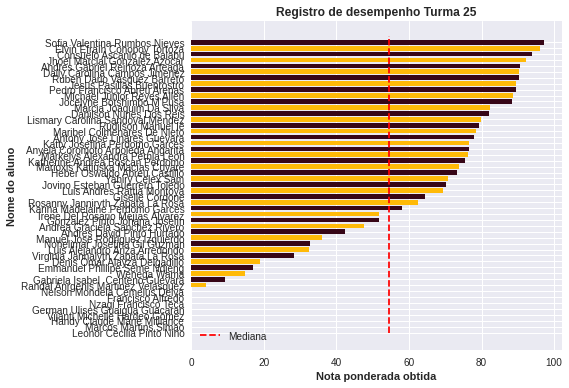

In [ ]:
plt.style.use("seaborn")
plt.barh(depurado.index, depurado["Nota_Pond"], color=colors)
plt.vlines(depurado["Nota_Pond"].mean(), 0, len(depurado), color="red", linestyles="dashed", label="Mediana")
plt.title("Registro de desempenho Turma 25", fontweight="bold")
plt.xlabel("Nota ponderada obtida", fontweight="bold")
plt.ylabel("Nome do aluno", fontweight="bold")
plt.legend()
plt.tight_layout()
plt.show()